# Part II - (Effect Of Loan Characteristics To Predict Borrower's APR)


# 
## Investigation Overview

In this investigation, I wanted to look at the characteristics of Loan that could be used to predict their Borrower's APR. The main focus was on the following things:
LoanOriginalamount
Prosper rating (Alpha)
Term
Stated Monthly Income

## Dataset Overview

This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. In this dataset, we are using the data from the Posper to analyse it and trying to find the pattern in the Prosper data.

This dataset contains information about loan listings and related variables including borrower as well as lender information. It contains variables related to Borrower such as credit rating, prosper rating etc. Moreover, the dataset also has lender information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
loandata = pd.read_csv('prosperLoanData.csv')


In [3]:
# Subset the dataframe by selecting features of interest
chosen_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate','BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

chosen_loandata = loandata[chosen_columns]
chosen_loandata = chosen_loandata.dropna(subset=['ProsperRating (Alpha)']).reset_index()

chosen_loandata['TotalProsperLoans'] = chosen_loandata['TotalProsperLoans'].fillna(0)

# remove outliers
chosen_loandata = chosen_loandata[chosen_loandata.StatedMonthlyIncome<=30000]

# Convert ProsperRating into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
chosen_loandata['ProsperRating (Alpha)'] = chosen_loandata['ProsperRating (Alpha)'].astype(ordered_var)


# Distribution of Borrower APR(The Borrower's Annual percentage Rate)

The distribution of APR looks multimodal. A small peak is centered at 0.1, a larger peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.45.


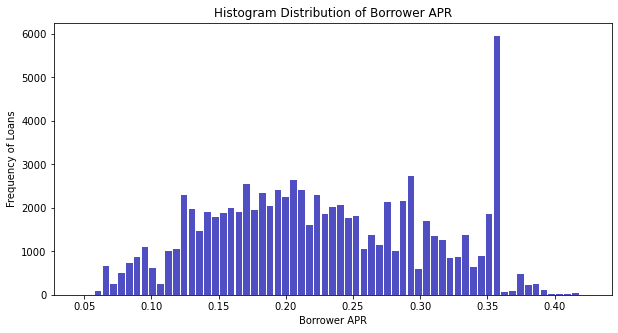

In [4]:
plt.figure(figsize = [10, 5])
n,bins, patches = plt.hist(data = chosen_loandata, x = 'BorrowerAPR',  bins='auto', color='#0504aa', 
                            alpha=0.7, rwidth=0.85)
#plt.xlabel('Borrower APR')
#plt.ylabel('Frequency of Loans')
plt.title('Histogram Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('Frequency of Loans');

# LoanStatus(completed,Defaulted,Cancelled,Chargedoff):

In [5]:
a_count=chosen_loandata[chosen_loandata["LoanStatus"]=='FinalPaymentInProgress'].count()["index"]

print (a_count)
b_count=chosen_loandata[chosen_loandata["LoanStatus"]=='Completed'].count()["index"]

print (b_count)
r_count=chosen_loandata[chosen_loandata["LoanStatus"]=='Defaulted'].count()["index"]

print (r_count)
rchc_count=chosen_loandata[chosen_loandata["LoanStatus"]=='Cancelled'].count()["index"]

print (rchc_count)
rc_count=chosen_loandata[chosen_loandata["LoanStatus"]=='PastDue'].count()["index"]

print (rc_count)

204
19606
1005
0
0


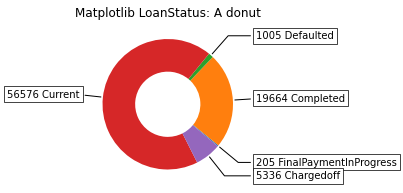

In [6]:

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["205 FinalPaymentInProgress",
          "19664 Completed",
          "1005 Defaulted",
          "56576 Current",
          "5336 Chargedoff"
          ]

data = [205, 19664, 1005, 56576, 5336]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib LoanStatus: A donut")

plt.show()

# Effect of Loan Amount on Borrower's APR)

By observing the above plot we can infer that with rising Loan amount the value of APR is decreasing.Overall, the borrower APR is negatively correlated with loan amount.

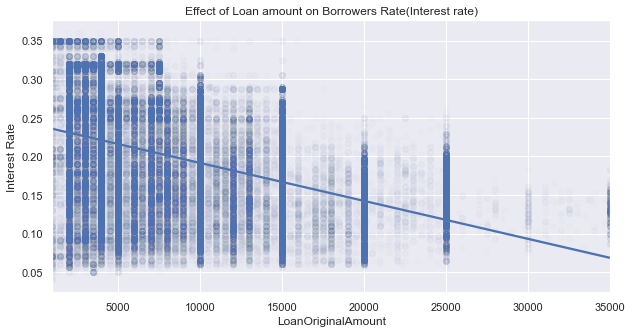

In [7]:
plt.figure(figsize = [10, 5])
sb.set_theme(color_codes=True)
sb.regplot(data = chosen_loandata, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
plt.title('Effect of Loan amount on Borrowers Rate(Interest rate)')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Interest Rate');

# Effect of Term on ProsperRating:
we can see below that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. We can also infer from above plot that ProsperRating (Prosper rating represents an estimated average annualized loss rate range to the investor) in this loandata set is mostly for a period of 36(3 years) months loan Term.Beside that we can see that prosper rating 'A' (according to Prosper loan system,Estimated average annual loss rate of 2.00–3.99%)is highest in 36 months term.

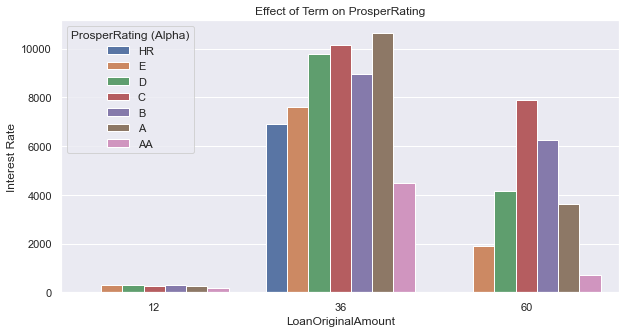

In [8]:
plt.figure(figsize = [10, 5])
sb.set_theme(style="darkgrid")
sb.countplot(data = chosen_loandata, x = 'Term', hue = 'ProsperRating (Alpha)')
plt.title('Effect of Term on ProsperRating')
#plt.title('Effect of Loan amount on Borrowers Rate(Interest rate)')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Interest Rate');

# Effect of ProsperRating on Borrowers APR and Loanamount:
The borrower APR and loan amount is positively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be negative when the ratings are B,Aand AA.


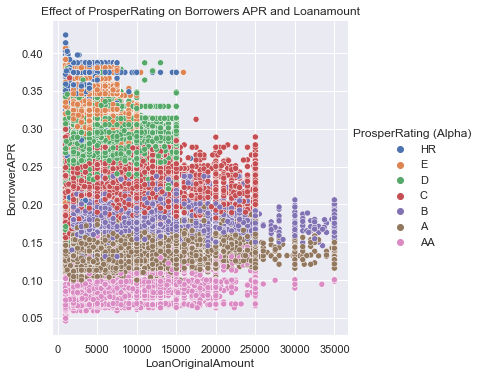

In [9]:
#plt.figure(figsize = [10, 5])
sb.relplot(data=chosen_loandata, x="LoanOriginalAmount", y="BorrowerAPR", hue="ProsperRating (Alpha)"
          )
#plt.title('Effect of ProsperRating on Borrowers APR and Loanamount')
plt.title('Effect of ProsperRating on Borrowers APR and Loanamount')
#plt.title('Effect of Loan amount on Borrowers Rate(Interest rate)')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

# Effect of Term on Borrower's APR and Loanamount:

Term here seems to have a significant effect on Borrower's APR and Loan amount.Mostly loan term is 60 months(5years).
APR for 3 years lon(36 months) is higher than the APR for 5 years(60 months)loan.
That means that Borrowers rate/interst rate is dropping for longer length term loans.

In [10]:
chosen_loandata['LoanOriginalAmount'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
LoanOriginalAmount,84604.0,9063.000993,6267.225315,1000.0,4000.0,7500.0,13500.0,35000.0


In [11]:
chosen_loandata['Loan_Amount'] =((chosen_loandata['LoanOriginalAmount']//1000)*1000)

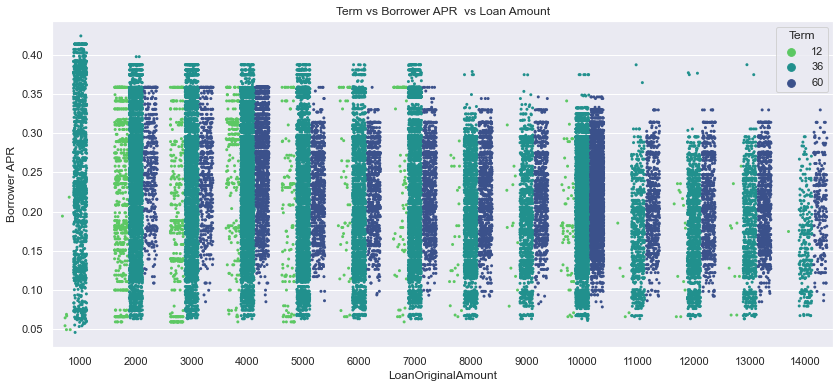

In [12]:
plt.figure(figsize = [14, 6])
sb.stripplot(data=chosen_loandata.query('LoanOriginalAmount<=14000'),x='Loan_Amount',y = 'BorrowerAPR' ,hue='Term' ,palette='viridis_r' ,jitter=0.35 ,dodge=True ,size=3)

plt.title('Term vs Borrower APR  vs Loan Amount');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Borrower APR');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt